# Position-switched Data Reduction
----------------------------------

This notebook shows how to use `dysh` to calibrate an OnOff observation.

In [1]:
import wget

import astropy.units as u

from dysh.fits.gbtfitsload import GBTFITSLoad

In [2]:
url = "http://www.gb.nrao.edu/dysh/example_data/onoff-L/data/TGBT21A_501_11.raw.vegas.fits"
filename = wget.download(url)
print(filename)

 29% [....................                                                  ] 235528192 / 795479040

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



 81% [........................................................              ] 645423104 / 795479040

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



100% [......................................................................] 795479040 / 795479040TGBT21A_501_11.raw.vegas.fits


In [3]:
#f = '/data/gbt/examples/onoff-L/data/TGBT21A_501_11.raw.vegas.fits'
sdfits = GBTFITSLoad(filename)
sdfits.info()

Filename: TGBT21A_501_11.raw.vegas.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      12   ()      
  1  SINGLE DISH    1 BinTableHDU    245   6040R x 74C   ['32A', '1D', '22A', '1D', '1D', '1D', '32768E', '16A', '6A', '8A', '1D', '1D', '1D', '4A', '1D', '4A', '1D', '1I', '32A', '32A', '1J', '32A', '16A', '1E', '8A', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '1D', '8A', '1D', '1D', '12A', '1I', '1I', '1D', '1D', '1I', '1A', '1I', '1I', '16A', '16A', '1J', '1J', '22A', '1D', '1D', '1I', '1A', '1D', '1E', '1D', '1D', '1D', '1D', '1D', '1A', '1A', '8A', '1E', '1E', '16A', '1I', '1I', '1I']   


In [4]:
sdfits.summary()

,SCAN,OBJECT,VELOCITY,PROC,PROCSEQN,RESTFREQ,DOPFREQ,# IF,# POL,# INT,# FEED,AZIMUTH,ELEVATIO
0,152,NGC2415,3784.0,OnOff,1,1.617185,1.420406,5,2,151,1,286.218008,41.62843
1,153,NGC2415,3784.0,OnOff,2,1.617185,1.420406,5,2,151,1,286.886521,41.118134


In [5]:
psscan = sdfits.getps(152, ifnum=0, plnum=0)
psscan.calibrate()

FILE  TGBT21A_501_11.raw.vegas.fits
FILE  TGBT21A_501_11.raw.vegas.fits


In [6]:
print(f"T_sys = {psscan[0].tsys.mean():.2f}")

T_sys = 17.17


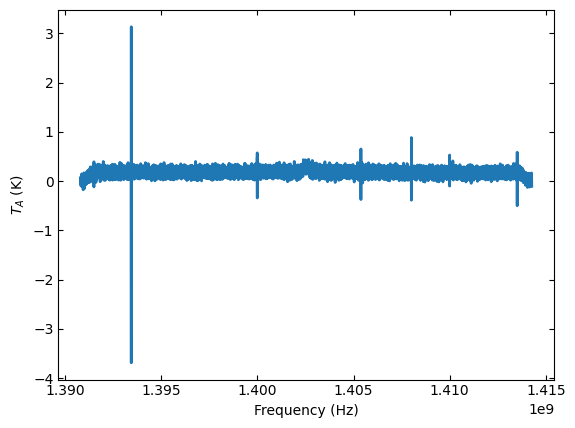

In [8]:
ta = psscan.timeaverage(weights='tsys')

In [ ]:
ta[0].plot()

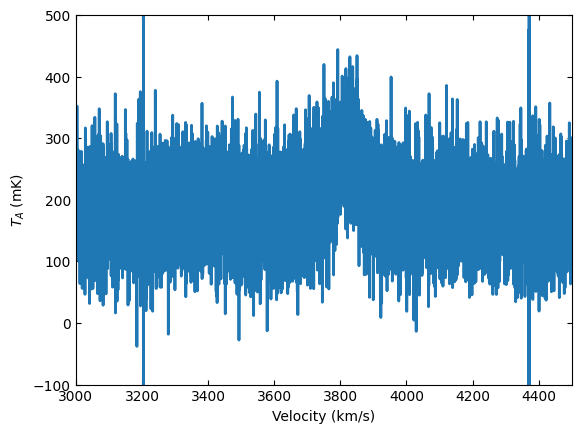

In [9]:
ta[0].plot(xaxis_unit="km/s",yaxis_unit="mK",ymin=-100,ymax=500,xmin=3000,xmax=4500)

In [11]:
kms = u.km/u.s
ta[0].baseline(degree=2,exclude=[3600*kms,4100*kms],remove=True)

EXCLUDING [Spectral Region, 1 sub-regions:
  (1401242184.363393 Hz, 1403551474.1090915 Hz) 
]


 [astropy.modeling.fitting]


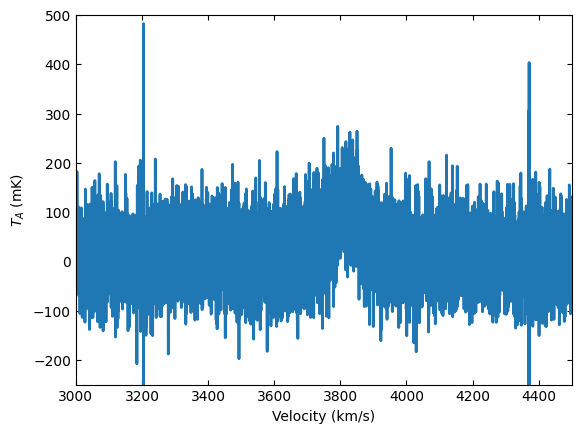

In [12]:
ta[0].plot(ymin=-250)

In [13]:
print(ta[0].baseline_model)

Model: Polynomial1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Degree: 2
Parameters:
             c0                   c1                    c2          
             K                  K / Hz               K / Hz2        
    ------------------- --------------------- ----------------------
    0.16984671749959526 6.155580315232285e-29 2.2305012033296116e-56


In [14]:
ta[0].savefig("baselined_removed.png")